In [1]:
import pandas as pd
from utils import *
# Replace 'your_file.csv' with the path to your actual CSV file
file_path = 'data/fraud/fraudTest.csv'

# Read the CSV file into a DataFrame
df_test = pd.read_csv(file_path)

df_train = pd.read_csv('data/fraud/fraudTrain.csv')

df = pd.concat([df_train, df_test], ignore_index=True)
# Display the first few rows of the DataFrame to confirm it's loaded correctly
len(df)

1852394

<Figure size 2400x1800 with 0 Axes>

In [2]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [3]:
grouped = df.groupby(pd.Grouper(key='trans_date_trans_time', freq='M'))
monthly_dfs = {group.strftime('%Y-%m'): data for group, data in grouped}
print(monthly_dfs['2020-08'])


         Unnamed: 0 trans_date_trans_time               cc_num  \
1412581      115906   2020-08-01 00:00:09      376445266762684   
1412582      115907   2020-08-01 00:00:32     3595111028444131   
1412583      115908   2020-08-01 00:00:48      377654590313960   
1412584      115909   2020-08-01 00:01:47     3559723917628303   
1412585      115910   2020-08-01 00:02:32  4958589671582726883   
...             ...                   ...                  ...   
1501335      204660   2020-08-31 23:58:11         581293083266   
1501336      204661   2020-08-31 23:58:19       38588538868506   
1501337      204662   2020-08-31 23:58:19  4428780983793657331   
1501338      204663   2020-08-31 23:58:40     6011693194885790   
1501339      204664   2020-08-31 23:59:31  4319584480204988982   

                                     merchant       category    amt  \
1412581      fraud_Stehr, Jewess and Schimmel       misc_net   6.97   
1412582              fraud_Turcotte-Halvorson       misc_pos   1.

In [4]:
# basically, 2 years of data, 1.5 train 0.5 test! mews
len(monthly_dfs)
for i in monthly_dfs:
    print(monthly_dfs[i])

       Unnamed: 0 trans_date_trans_time            cc_num  \
0               0   2019-01-01 00:00:18  2703186189652095   
1               1   2019-01-01 00:00:44      630423337322   
2               2   2019-01-01 00:00:51    38859492057661   
3               3   2019-01-01 00:01:16  3534093764340240   
4               4   2019-01-01 00:03:06   375534208663984   
...           ...                   ...               ...   
52520       52520   2019-01-31 23:56:42  3514865930894695   
52521       52521   2019-01-31 23:57:30  6538891242532018   
52522       52522   2019-01-31 23:57:36  3543591270174051   
52523       52523   2019-01-31 23:58:14  4377338765909719   
52524       52524   2019-01-31 23:59:15   378904938837132   

                                 merchant       category     amt        first  \
0              fraud_Rippin, Kub and Mann       misc_net    4.97     Jennifer   
1         fraud_Heller, Gutmann and Zieme    grocery_pos  107.23    Stephanie   
2                    fra

In [5]:
# reference_data = pd.concat([monthly_dfs["2019-01"], monthly_dfs["2019-02"]], ignore_index=True)
reference_data = monthly_dfs["2019-01"]
reference_data = reference_data["amt"].tolist()
ground_truth_vals = []
bins_vals = []
digest_vals = []

first = True
for m in monthly_dfs:
    if first:
        first = False
        continue
    test_data = monthly_dfs[m]["amt"].tolist()
    original_ks = get_original_ks(reference_data, test_data)
    ground_truth_vals.append(original_ks)
    print(f'original ks_score: {original_ks}')
    bins_val = get_bins_ks(reference_data, test_data)
    bins_vals.append(bins_val)
    print(f'Bins KS score: {bins_val}')
    dig_val = get_digest_ks(reference_data, test_data)
    digest_vals.append(dig_val)
    print(f'Digest KS score: {dig_val}')

    print("----------------------------------------------------")

original ks_score: 0.004254316752141829


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 49866. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


Bins KS score: 0.0031618124484136356
reference_digest.batch_update(ref_data) took:1.3445234298706055 seconds to run.
test_digest.batch_update(ref_data) took:1.0535335540771484 seconds to run.
checking the loop took:68.9267008304596 seconds to run.
Digest KS score: 0.004543866531255825
----------------------------------------------------
original ks_score: 0.008539202879784113
Bins KS score: 0.007680738019221412
reference_digest.batch_update(ref_data) took:1.1347312927246094 seconds to run.
test_digest.batch_update(ref_data) took:1.4314792156219482 seconds to run.
checking the loop took:64.78681516647339 seconds to run.
Digest KS score: 0.009301009030953766
----------------------------------------------------
original ks_score: 0.004447318240483389
Bins KS score: 0.004271665369590036


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 68078. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.1531827449798584 seconds to run.
test_digest.batch_update(ref_data) took:1.4592928886413574 seconds to run.
checking the loop took:63.29048013687134 seconds to run.
Digest KS score: 0.00466797690465115
----------------------------------------------------
original ks_score: 0.004019108321550169
Bins KS score: 0.0035817476206333656


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 72532. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.0892572402954102 seconds to run.
test_digest.batch_update(ref_data) took:1.4055519104003906 seconds to run.
checking the loop took:65.166668176651 seconds to run.
Digest KS score: 0.004076201194542717
----------------------------------------------------
original ks_score: 0.004120814998019251
Bins KS score: 0.003925932631165055
reference_digest.batch_update(ref_data) took:0.9818716049194336 seconds to run.
test_digest.batch_update(ref_data) took:1.699781894683838 seconds to run.
checking the loop took:71.47430539131165 seconds to run.
Digest KS score: 0.004674578016535869
----------------------------------------------------
original ks_score: 0.006062649978127721
Bins KS score: 0.005172672592620445


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 86596. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.3661537170410156 seconds to run.
test_digest.batch_update(ref_data) took:1.7952194213867188 seconds to run.
checking the loop took:64.60669589042664 seconds to run.
Digest KS score: 0.00673169352770131
----------------------------------------------------
original ks_score: 0.008439119620509916
Bins KS score: 0.008004613066318786


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 87359. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.022977352142334 seconds to run.
test_digest.batch_update(ref_data) took:1.8123764991760254 seconds to run.
checking the loop took:68.10171961784363 seconds to run.
Digest KS score: 0.0088986498916942
----------------------------------------------------
original ks_score: 0.007876935096917226
Bins KS score: 0.007471907207236888


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 70652. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.086411952972412 seconds to run.
test_digest.batch_update(ref_data) took:1.4450759887695312 seconds to run.
checking the loop took:69.25688624382019 seconds to run.
Digest KS score: 0.008503212738262822
----------------------------------------------------
original ks_score: 0.0034881831205442193
Bins KS score: 0.0028661907840619493


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 68758. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.5253973007202148 seconds to run.
test_digest.batch_update(ref_data) took:2.1471354961395264 seconds to run.
checking the loop took:91.05386018753052 seconds to run.
Digest KS score: 0.003667003418330983
----------------------------------------------------
original ks_score: 0.004008107058790067
Bins KS score: 0.0037026934783561598


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 70421. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.5801310539245605 seconds to run.
test_digest.batch_update(ref_data) took:1.942223310470581 seconds to run.
checking the loop took:88.88131999969482 seconds to run.
Digest KS score: 0.004496791749182494
----------------------------------------------------
original ks_score: 0.005217726963313669
Bins KS score: 0.004914258689882685
reference_digest.batch_update(ref_data) took:1.462170124053955 seconds to run.
test_digest.batch_update(ref_data) took:4.13791823387146 seconds to run.
checking the loop took:94.4360785484314 seconds to run.
Digest KS score: 0.005700121477617337
----------------------------------------------------
original ks_score: 0.0040127053037352645
Bins KS score: 0.0036699566420860773


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 52202. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.4772861003875732 seconds to run.
test_digest.batch_update(ref_data) took:1.5234570503234863 seconds to run.
checking the loop took:94.59212064743042 seconds to run.
Digest KS score: 0.0043575717825384275
----------------------------------------------------
original ks_score: 0.004300704805115241
Bins KS score: 0.0036707346961933384


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 47791. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.5251035690307617 seconds to run.
test_digest.batch_update(ref_data) took:1.322633981704712 seconds to run.
checking the loop took:89.15922331809998 seconds to run.
Digest KS score: 0.004579862888969499
----------------------------------------------------
original ks_score: 0.003733268172785649
Bins KS score: 0.0029100696240019117
reference_digest.batch_update(ref_data) took:1.4630651473999023 seconds to run.
test_digest.batch_update(ref_data) took:2.0435404777526855 seconds to run.
checking the loop took:93.76209998130798 seconds to run.
Digest KS score: 0.0040203014724106145
----------------------------------------------------
original ks_score: 0.00461898032626884
Bins KS score: 0.004469091140199176


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 66892. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.661970853805542 seconds to run.
test_digest.batch_update(ref_data) took:1.8255188465118408 seconds to run.
checking the loop took:112.43778681755066 seconds to run.
Digest KS score: 0.0045539605753780465
----------------------------------------------------
original ks_score: 0.006070492955382589
Bins KS score: 0.0059065902791557165


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 74343. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.5726702213287354 seconds to run.
test_digest.batch_update(ref_data) took:2.0628087520599365 seconds to run.
checking the loop took:92.2166121006012 seconds to run.
Digest KS score: 0.006316629014424646
----------------------------------------------------
original ks_score: 0.004049623070853779
Bins KS score: 0.003991479648514787
reference_digest.batch_update(ref_data) took:1.019660234451294 seconds to run.
test_digest.batch_update(ref_data) took:1.8440208435058594 seconds to run.
checking the loop took:65.73846006393433 seconds to run.
Digest KS score: 0.004685849322344615
----------------------------------------------------
original ks_score: 0.006086403956456543
Bins KS score: 0.005966407048824136


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 85848. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.1073176860809326 seconds to run.
test_digest.batch_update(ref_data) took:1.7896013259887695 seconds to run.
checking the loop took:86.04364609718323 seconds to run.
Digest KS score: 0.006072501882818271
----------------------------------------------------
original ks_score: 0.005652029446877417
Bins KS score: 0.005366819227948066
reference_digest.batch_update(ref_data) took:1.0202076435089111 seconds to run.
test_digest.batch_update(ref_data) took:1.8684687614440918 seconds to run.
checking the loop took:70.88032698631287 seconds to run.
Digest KS score: 0.00569327543362641
----------------------------------------------------
original ks_score: 0.005027926535630556
Bins KS score: 0.00470414162319989


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 69533. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.1385066509246826 seconds to run.
test_digest.batch_update(ref_data) took:1.453904151916504 seconds to run.
checking the loop took:79.63858389854431 seconds to run.
Digest KS score: 0.005842048106978859
----------------------------------------------------
original ks_score: 0.004107362471587939
Bins KS score: 0.003964396247559132


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 69348. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.1000046730041504 seconds to run.
test_digest.batch_update(ref_data) took:1.3830292224884033 seconds to run.
checking the loop took:88.78459882736206 seconds to run.
Digest KS score: 0.0049788504140095835
----------------------------------------------------
original ks_score: 0.005437877055204891
Bins KS score: 0.005192162163074474
reference_digest.batch_update(ref_data) took:1.6316659450531006 seconds to run.
test_digest.batch_update(ref_data) took:2.141619920730591 seconds to run.
checking the loop took:90.73834347724915 seconds to run.
Digest KS score: 0.005849616375889766
----------------------------------------------------
original ks_score: 0.006111435705462465
Bins KS score: 0.0059717842661974295


C:\Users\nader\PycharmProjects\Edge_ML_KS-Test\utils.py:9: RuntimeWarning: Exact ks_2samp calculation not possible with samples sizes 52525 and 139538. Switching to 'asymp'.
  ks_score, _ = ks_2samp(ref_data, t_data, method='exact')


reference_digest.batch_update(ref_data) took:1.572831392288208 seconds to run.
test_digest.batch_update(ref_data) took:3.9254400730133057 seconds to run.
checking the loop took:92.34311008453369 seconds to run.
Digest KS score: 0.0061684457694793915
----------------------------------------------------


In [6]:
print(ground_truth_vals)

[0.004254316752141829, 0.008539202879784113, 0.004447318240483389, 0.004019108321550169, 0.004120814998019251, 0.006062649978127721, 0.008439119620509916, 0.007876935096917226, 0.0034881831205442193, 0.004008107058790067, 0.005217726963313669, 0.0040127053037352645, 0.004300704805115241, 0.003733268172785649, 0.00461898032626884, 0.006070492955382589, 0.004049623070853779, 0.006086403956456543, 0.005652029446877417, 0.005027926535630556, 0.004107362471587939, 0.005437877055204891, 0.006111435705462465]


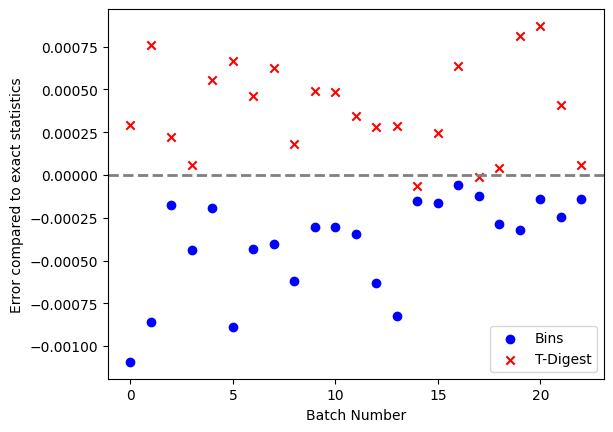

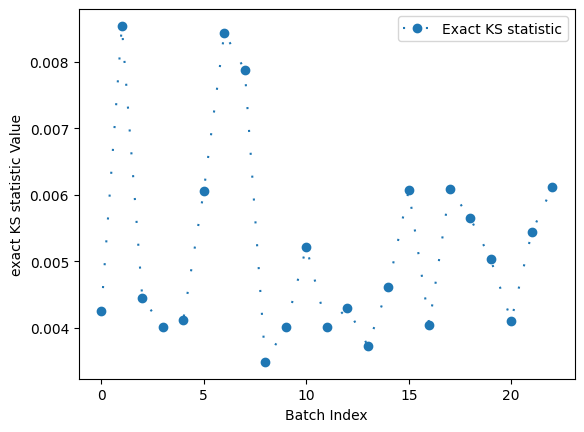

In [7]:

plot_errors_lines(ground_truth_vals, bins_vals, digest_vals, figure_name="fraud_monthly_chunk_23_batches")


plot_exact_KS(ground_truth_vals, figure_name="fraud_1_original_KS")
